### Módulo 3 - aula 9 - Mão na massa: análise e seleção de modelos de regressão linear

Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos.

Nesta atividade, sua tarefa envolve conduzir as seguintes etapas:

- análise inicial com o PairPlot da Seaborn;
- construir modelos de regressão linear; e
- realizar a comparação desses modelos.


In [2]:
import seaborn as sns
import pandas as pd

In [4]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso14_data_science_testando_relacoes_com_regressao_linear\\exercicio_proposto_modulo3_aula9\\hoteis.csv')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [6]:
dados

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


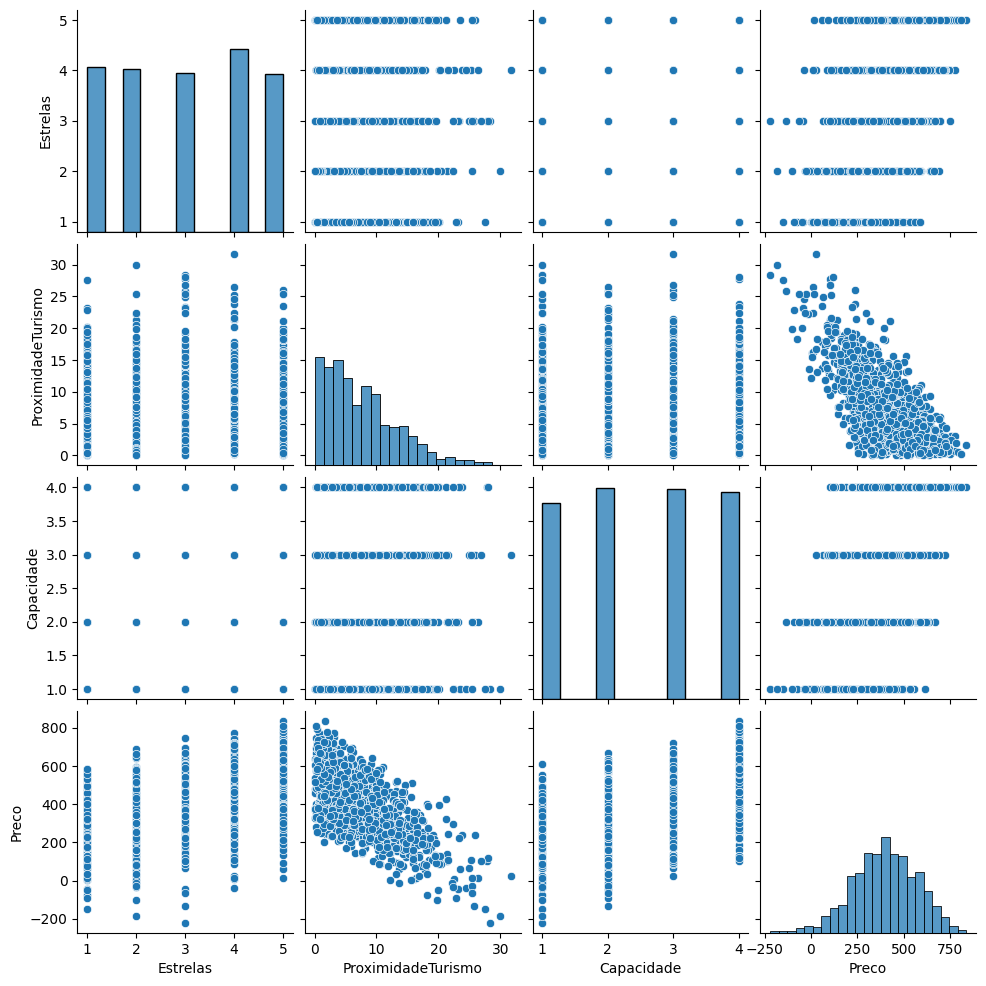

In [5]:
sns.pairplot(dados)

In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Definindo y e x
y = dados['Preco']
x = dados.drop(columns=['Preco'])

In [15]:
#Aplicando o split do y e X
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [16]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data = x_train)
df_train['Preco'] = y_train

In [17]:
# import ols
from statsmodels.formula.api import ols

In [18]:
# ajustando o primeiro modelo
modelo_0 = ols('Preco ~ ProximidadeTurismo', data=df_train).fit()

In [19]:
# visualizando os parametros
modelo_0.params

Intercept             556.772722
ProximidadeTurismo    -20.535830
dtype: float64

In [20]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     660.6
Date:                qua, 16 jul 2025   Prob (F-statistic):          4.97e-103
Time:                        21:47:34   Log-Likelihood:                -4358.9
No. Observations:                 700   AIC:                             8722.
Df Residuals:                     698   BIC:                             8731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            556.7727      7

In [21]:
# importando a api do statsmodels
import statsmodels.api as sm

In [22]:
# adicionando o constante
x_train = sm.add_constant(x_train)

In [23]:
x_train.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
740,1.0,5,9.724029,3
182,1.0,4,14.893560,4
39,1.0,4,2.524966,1
29,1.0,4,16.709430,2
221,1.0,2,0.229598,1


In [24]:
x_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [25]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

In [26]:
# Modelo sem a ProximidadeTurismo
modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas', 'Capacidade']]).fit()

In [27]:
# Modelo sem Estrelas
modelo_3 = sm.OLS(y_train,
                    x_train[['const', 'ProximidadeTurismo', 'Capacidade']]).fit()

In [28]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                qua, 16 jul 2025   Prob (F-statistic):               0.00
Time:                        21:53:09   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.1576      6

In [29]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     281.1
Date:                qua, 16 jul 2025   Prob (F-statistic):           3.01e-90
Time:                        21:53:23   Log-Likelihood:                -4385.0
No. Observations:                 700   AIC:                             8776.
Df Residuals:                     697   BIC:                             8790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4104     16.170      2.375      0.0

In [30]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1066.
Date:                qua, 16 jul 2025   Prob (F-statistic):          9.00e-213
Time:                        21:53:43   Log-Likelihood:                -4101.7
No. Observations:                 700   AIC:                             8209.
Df Residuals:                     697   BIC:                             8223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                355.0018      9

In [31]:
print("R²")
print('Modelo_0:', modelo_0.rsquared)
print('Modelo_1:', modelo_1.rsquared)
print('Modelo_2:', modelo_2.rsquared)
print('Modelo_3:', modelo_3.rsquared)

R²
Modelo_0: 0.4862217617831247
Modelo_1: 0.9241850901112033
Modelo_2: 0.44649104153622876
Modelo_3: 0.7536532740101605


In [32]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
4
3
3


In [34]:
modelo_1.params

const                 195.157575
Estrelas               50.503055
ProximidadeTurismo    -20.356643
Capacidade             81.526144
dtype: float64

Conclusão: o modelo escolhido é o modelo 1. O Modelo 1 explica 92.4% da variância no Preco. A inclusão das variáveis Estrelas e Capacidade no Modelo 1 adiciona um poder explicativo muito significativo. O Modelo 1 é um modelo mais parcimonioso e com melhor ajuste geral, mesmo considerando sua maior complexidade. A combinação de Estrelas, ProximidadeTurismo e Capacidade no Modelo 1 fornece uma explicação muito mais robusta e completa para o preço, tornando-o a escolha superior para fins preditivos e de inferência.